# OLD TEST

In [0]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image
from keras.activations import relu, softmax
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
!ls

image_0031.jpg	sample_data


In [0]:
!wget "http://www.vision.caltech.edu/Image_Datasets/Caltech101/SamplePics/image_0031.jpg"

--2018-12-31 19:31:40--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/SamplePics/image_0031.jpg
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17413 (17K) [image/jpeg]
Saving to: ‘image_0031.jpg’

image_0031.jpg      100%[===================>]  17.00K  --.-KB/s    in 0.1s    

2018-12-31 19:31:41 (118 KB/s) - ‘image_0031.jpg’ saved [17413/17413]



In [0]:
model = vgg16.VGG16(weights='imagenet')
# model.summary()

#### IMP

In [0]:
# For cchanging the activation fn of the last layer

# t = model.layers[-1]
# t.weights
# ses = K.get_session()
# w = ses.run(t.weights)

# from keras.layers import Dense
# from keras.models import Model
# o = Dense(1000, activation='linear', name='predictions', weights=w)
# model2 = Model(inputs=model.input, outputs=o(model.layers[-2].output))
# model2.compile(optimizer='sgd', loss='categorical_crossentropy')

In [0]:
# for l in model2.layers:
#   try:
#     print(l.name, l.activation, l.weights)
#   except Exception:
#     pass
# # model.layers[-1].activation = relu

# OLD

(1, 1000)
Predicted: [('n01871265', 'tusker', 0.52307105), ('n02504458', 'African_elephant', 0.43376687), ('n02504013', 'Indian_elephant', 0.043161675)]


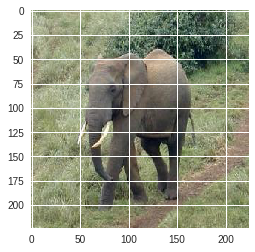

In [0]:
img_path = 'image_0031.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = model.predict(x)
print(preds.shape)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

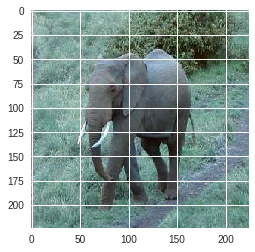

In [0]:
t = np.clip((x[0]+[103.939, 116.779, 123.68]), 0, 255)/255
plt.imshow(t)

In [0]:
# import tensorflow as tf
sess = K.get_session()
grads = K.gradients(model.output[0][950], model.input)
x_adv = x - K.sign(grads[0])
x_adv = sess.run(x_adv, feed_dict={model.input:x})

In [0]:
np.max(sess.run(grads, feed_dict={model.input:x})[0][0])

3.0749993e-17

https://cv-tricks.com/how-to/breaking-deep-learning-with-adversarial-examples-using-tensorflow/


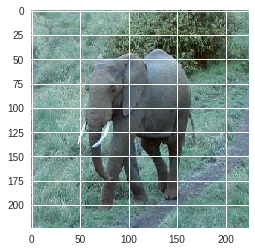

In [0]:
plt.imshow(np.clip((x_adv[0]+[103.939, 116.779, 123.68]), 0, 255)/255)

In [0]:
preds = model.predict(x_adv)
np.argmax(preds)
# print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

101

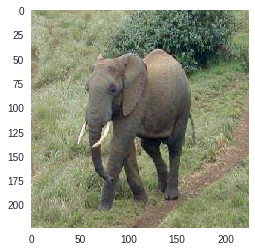

In [0]:
def plot_img(x):
  t = np.zeros_like(x[0])
  t[:,:,0] = x[0][:,:,2]
  t[:,:,1] = x[0][:,:,1]
  t[:,:,2] = x[0][:,:,0]  
  plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
  plt.grid('off')
  
plot_img(x_adv)

Temp


0 [('n01871265', 'tusker', 0.505686), ('n02504458', 'African_elephant', 0.44370905), ('n02504013', 'Indian_elephant', 0.0506035)]
1 [('n01871265', 'tusker', 0.485941), ('n02504458', 'African_elephant', 0.45607984), ('n02504013', 'Indian_elephant', 0.05797442)]
2 [('n02504458', 'African_elephant', 0.46788678), ('n01871265', 'tusker', 0.4674167), ('n02504013', 'Indian_elephant', 0.06468143)]
3 [('n02504458', 'African_elephant', 0.4858479), ('n01871265', 'tusker', 0.4441467), ('n02504013', 'Indian_elephant', 0.06996153)]
4 [('n02504458', 'African_elephant', 0.5059686), ('n01871265', 'tusker', 0.4195203), ('n02504013', 'Indian_elephant', 0.0743933)]
5 [('n02504458', 'African_elephant', 0.5251671), ('n01871265', 'tusker', 0.3957091), ('n02504013', 'Indian_elephant', 0.07882485)]
6 [('n02504458', 'African_elephant', 0.5395588), ('n01871265', 'tusker', 0.3762125), ('n02504013', 'Indian_elephant', 0.08351205)]
7 [('n02504458', 'African_elephant', 0.5473269), ('n01871265', 'tusker', 0.3632534),

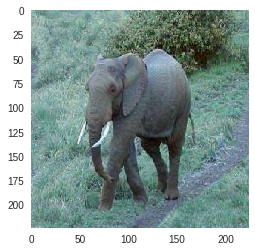

In [0]:
sess = K.get_session()

x_adv = x

for i in range(40): 
  grads = K.gradients(model.output, model.input)
  x_adv = x_adv - 0.1*K.sign(grads[0])
  x_adv = sess.run(x_adv, feed_dict={model.input:x})
  preds = model.predict(x_adv)
  print(i, vgg16.decode_predictions(preds, top=3)[0])
  
plot_img(x_adv-x)
plot_img(x_adv)

# Checkpoint 0

Import libraries

```python
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image
from keras.activations import relu, softmax
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline
```
Get input image

```
!wget "http://www.vision.caltech.edu/Image_Datasets/Caltech101/SamplePics/image_0031.jpg"
!mv image_0031.jpg img.jpg
```

Pretrained VGG-16 network
```python
model = vgg16.VGG16(weights='imagenet')
```
Load and prepocess the image. Get initial predicted class

```python
img_path = 'img.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])
```

Function to restore image
```python
def plot_img(x):
  """
  x is a BGR image with shape (? ,224, 224, 3) 
  """
  t = np.zeros_like(x[0])
  t[:,:,0] = x[0][:,:,2]
  t[:,:,1] = x[0][:,:,1]
  t[:,:,2] = x[0][:,:,0]  
  plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
  plt.grid('off')
  plt.axis('off')
#   plt.show()
```

```python
# Get current session(assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x

# Set variables

epochs = 40
epsilon = 0.1

for i in range(40): 
  # Gradient of the .......
  grads = K.gradients(model.output[0][initial_class], model.input) # Replace initial_class by desired class for targeted attack
  x_adv = x_adv - 0.1*K.sign(grads[0])
  x_adv = sess.run(x_adv, feed_dict={model.input:x})
  preds = model.predict(x_adv)
  print(i, vgg16.decode_predictions(preds, top=3)[0])
  
plot_img(x_adv-x)
plot_img(x_adv)
```

# Untargeted

In [1]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image
from keras.activations import relu, softmax
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
!wget "https://c.stocksy.com/a/uXv300/z9/936194.jpg"
!mv "936194.jpg" "flamingo.jpg"
!ls

--2019-01-02 17:57:13--  https://c.stocksy.com/a/uXv300/z9/936194.jpg
Resolving c.stocksy.com (c.stocksy.com)... 104.18.212.42, 104.18.213.42, 2606:4700::6812:d52a, ...
Connecting to c.stocksy.com (c.stocksy.com)|104.18.212.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186854 (182K) [image/jpeg]
Saving to: ‘936194.jpg’

936194.jpg          100%[===================>] 182.47K  --.-KB/s    in 0.02s   

2019-01-02 17:57:14 (9.17 MB/s) - ‘936194.jpg’ saved [186854/186854]

flamingo.jpg  robin.jpg  sample_data


In [3]:
model = vgg16.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 26s 0us/step


Predicted: [('n02007558', 'flamingo', 0.97905034), ('n03888257', 'parachute', 0.012363721), ('n01910747', 'jellyfish', 0.004028047)]


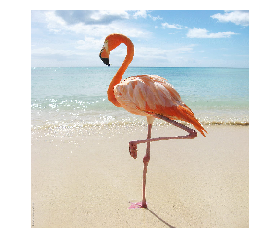

In [6]:
img_path = 'flamingo.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)
plt.grid('off')
plt.axis('off')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

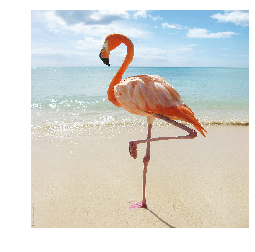

In [7]:
def plot_img(x):
  """
  x is a BGR image with shape (? ,224, 224, 3) 
  """
  t = np.zeros_like(x[0])
  t[:,:,0] = x[0][:,:,2]
  t[:,:,1] = x[0][:,:,1]
  t[:,:,2] = x[0][:,:,0]  
  plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
  plt.grid('off')
  plt.axis('off')
  plt.show()
  
plot_img(x)

0 0.9055895 [('n02007558', 'flamingo', 0.9055895), ('n03888257', 'parachute', 0.062128205), ('n01910747', 'jellyfish', 0.018678335)]
1 0.6782056 [('n02007558', 'flamingo', 0.6782056), ('n03888257', 'parachute', 0.22164449), ('n01910747', 'jellyfish', 0.06349664)]
2 0.35376313 [('n03888257', 'parachute', 0.44983763), ('n02007558', 'flamingo', 0.35376313), ('n01910747', 'jellyfish', 0.12586786)]
3 0.13991767 [('n03888257', 'parachute', 0.5927073), ('n01910747', 'jellyfish', 0.16431722), ('n02007558', 'flamingo', 0.13991767)]
4 0.050638195 [('n03888257', 'parachute', 0.642467), ('n01910747', 'jellyfish', 0.17369744), ('n09428293', 'seashore', 0.05853945)]
5 0.018133963 [('n03888257', 'parachute', 0.644559), ('n01910747', 'jellyfish', 0.16950373), ('n09428293', 'seashore', 0.08225929)]
6 0.00726863 [('n03888257', 'parachute', 0.6242612), ('n01910747', 'jellyfish', 0.16022463), ('n09428293', 'seashore', 0.10967024)]
7 0.0031094272 [('n03888257', 'parachute', 0.59319425), ('n01910747', 'jell

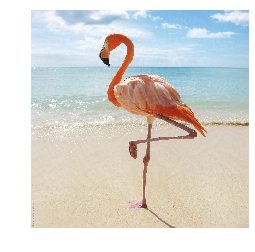

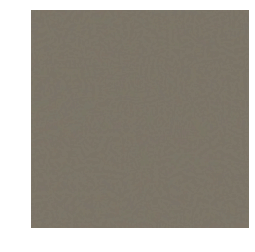

In [10]:
# Get current session(assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x

# Set variables
epochs = 15
epsilon = 0.1

for i in range(epochs): 
  # Gradient of the .......
  targt = np.zeros((1,1000))
  targt[0,initial_class] = 1
  grads = K.gradients(K.categorical_crossentropy(targt, model.output), model.input)
  x_adv = x_adv + epsilon*K.sign(grads[0])
  x_adv = sess.run(x_adv, feed_dict={model.input:x})
  preds = model.predict(x_adv)
#   if i%10==0:
  print(i, preds[0][initial_class], vgg16.decode_predictions(preds, top=3)[0])

plot_img(x_adv)   
plot_img(x_adv-x)

# Checkpoint 1

**Untargeted Completed**

# Targeted

In [1]:
!wget "https://www.active.com/Assets/Nutrition/460/Orange+Tree.jpg"
!mv "Orange+Tree.jpg" "orange.jpg"

--2019-01-02 12:23:42--  https://www.active.com/Assets/Nutrition/460/Orange+Tree.jpg
Resolving www.active.com (www.active.com)... 2.23.73.215
Connecting to www.active.com (www.active.com)|2.23.73.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204426 (200K) [image/jpeg]
Saving to: ‘Orange+Tree.jpg’

Orange+Tree.jpg     100%[===================>] 199.63K   429KB/s    in 0.5s    

2019-01-02 12:23:42 (429 KB/s) - ‘Orange+Tree.jpg’ saved [204426/204426]



In [2]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image
from keras.activations import relu, softmax
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
model = vgg16.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 16s 0us/step


40960/35363 [==================================] - 0s 4us/step
Predicted: [('n07747607', 'orange', 0.9942145), ('n07749582', 'lemon', 0.0041732057), ('n03991062', 'pot', 0.00032574168)]


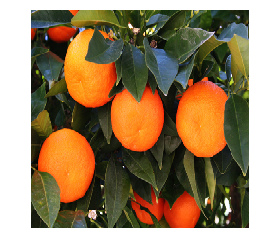

In [4]:
img_path = 'orange.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)
plt.grid('off')
plt.axis('off')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

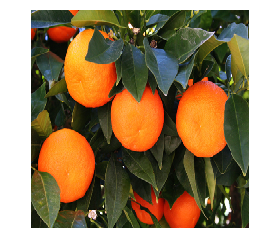

In [5]:
def plot_img(x):
  """
  x is a BGR image with shape (? ,224, 224, 3) 
  """
  t = np.zeros_like(x[0])
  t[:,:,0] = x[0][:,:,2]
  t[:,:,1] = x[0][:,:,1]
  t[:,:,2] = x[0][:,:,0]  
  plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
  plt.grid('off')
  plt.axis('off')
  plt.show()
  
# Sanity Check
plot_img(x)

In [0]:
# Get current session(assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x
# Added noise
x_noise = np.zeros_like(x)

0 4.3977878e-05 [('n07747607', 'orange', 0.9937941), ('n07749582', 'lemon', 0.004401493), ('n03991062', 'pot', 0.00035904808)]
20 0.00082135724 [('n07747607', 'orange', 0.974281), ('n07749582', 'lemon', 0.011465261), ('n03991062', 'pot', 0.0020506955)]
40 0.0082914 [('n07747607', 'orange', 0.9012804), ('n07749582', 'lemon', 0.024245316), ('n07718472', 'cucumber', 0.0082914)]
60 0.041148156 [('n07747607', 'orange', 0.71996695), ('n07718472', 'cucumber', 0.041148156), ('n07749582', 'lemon', 0.035623226)]
80 0.1031669 [('n07747607', 'orange', 0.46678492), ('n07718472', 'cucumber', 0.1031669), ('n07749582', 'lemon', 0.03712275)]
100 0.1654002 [('n07747607', 'orange', 0.27247137), ('n07718472', 'cucumber', 0.1654002), ('n07717410', 'acorn_squash', 0.049008265)]
120 0.21704683 [('n07718472', 'cucumber', 0.21704683), ('n07747607', 'orange', 0.1611568), ('n07717410', 'acorn_squash', 0.060482584)]
140 0.2550711 [('n07718472', 'cucumber', 0.2550711), ('n07747607', 'orange', 0.10305096), ('n07716

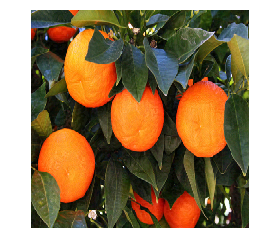

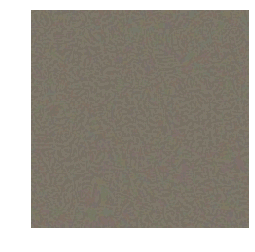

In [11]:
# Set variables
epochs = 400
epsilon = 0.01
target_class = 943 # cucumber
prev_probs = []

for i in range(epochs): 
  
  target = K.one_hot(target_class, 1000)
  
  loss = -1*K.categorical_crossentropy(target, model.output)
  grads = K.gradients(loss, model.input)
  
  delta = K.sign(grads[0])
  x_noise = x_noise + delta
  
  x_adv = x_adv + epsilon*delta
  
  x_adv = sess.run(x_adv, feed_dict={model.input:x})
  preds = model.predict(x_adv)
  
  prev_probs.append(preds[0][target_class])
  
  if i%20==0:
    print(i, preds[0][target_class], vgg16.decode_predictions(preds, top=3)[0])

plot_img(x_adv)
plot_img(x_adv-x)

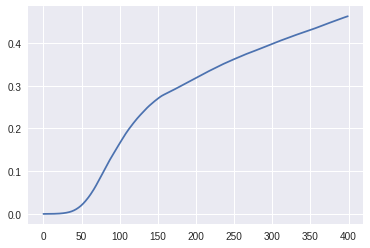

In [12]:
plt.plot(np.arange(0,len(prev_probs)), prev_probs)